# Unconstrained Integer Optimization: QUIO and HUIO

In typical Ising models and QUBO, variables are limited to binary variables $\sigma_i \in \{-1, +1\}$ or $x_i \in \{0, 1\}$. However, many real-world optimization problems require handling integer-valued variables.

In many cases, problems involving integer variables are solved by converting them to binary variables using binary encoding. However, this approach increases the number of variables and makes the problem more complex.

OpenJij can **directly solve** optimization problems where variables can take integer values:

- **QUIO (Quadratic Unconstrained Integer Optimization)**: Unconstrained integer optimization problems containing only terms up to quadratic order
- **HUIO (Higher-order Unconstrained Integer Optimization)**: Unconstrained integer optimization problems including higher-order terms

In this tutorial, we will learn how to solve these problems using OpenJij's `sample_quio` and `sample_huio` methods.

## QUIO: Quadratic Unconstrained Integer Optimization

Let's start with quadratic unconstrained integer optimization (QUIO), which contains only terms up to quadratic order. Consider an energy function of the following form:

$$
H = c + \sum_i h_i z_i + \sum_{i<j} J_{ij} z_i z_j
$$

where $z_i$ are integer variables, and each variable can take integer values within a specified range $[\text{lower}_i, \text{upper}_i]$.

### Example: 3-variable quadratic function optimization

Let's consider the following 3-variable quadratic function minimization problem:

$$
H = 10 - 5z_1 - 3z_2 - 4z_3 + 2z_1z_2 + z_1z_3 + 1.5z_2z_3
$$

Variable ranges:
- $z_1 \in [-2, 3]$
- $z_2 \in [-1, 4]$
- $z_3 \in [0, 5]$

Let's solve this problem with OpenJij.

In [1]:
# Install required libraries
!pip install openjij numpy matplotlib

In [2]:
import openjij as oj
import numpy as np
import matplotlib.pyplot as plt
import time

# Create SASampler
sampler = oj.SASampler()

In [3]:
# Define QUIO problem
# Interaction dictionary: keys are tuples, values are coefficients
J = {
    (): 10,        # constant term
    (1,): -5,      # linear term for z1
    (2,): -3,      # linear term for z2
    (3,): -4,      # linear term for z3
    (1, 2): 2,     # quadratic term z1*z2
    (1, 3): 1,     # quadratic term z1*z3
    (2, 3): 1.5    # quadratic term z2*z3
}

# Specify variable ranges
bound_list_quio = {
    1: (-2, 3),  # z1 ranges from -2 to 3
    2: (-1, 4),  # z2 ranges from -1 to 4
    3: (0, 5)    # z3 ranges from 0 to 5
}

print("QUIO problem:")
print(f"Interactions: {J}")
print(f"Variable ranges: {bound_list_quio}")

QUIO problem:
Interactions: {(): 10, (1,): -5, (2,): -3, (3,): -4, (1, 2): 2, (1, 3): 1, (2, 3): 1.5}
Variable ranges: {1: (-2, 3), 2: (-1, 4), 3: (0, 5)}


In [4]:
# Solve QUIO problem using sample_quio method
response_quio = sampler.sample_quio(
    J=J,
    bound_list=bound_list_quio,
    num_sweeps=1000,
    num_reads=10,
    num_threads=4,  # parallel sampling (macOS/Linux only)
    seed=12345
)

# Display optimal solution
best_solution = response_quio.first
print(f"Optimal solution: {best_solution.sample}")
print(f"Minimum energy: {best_solution.energy:.3f}")

Optimal solution: {1: 3, 2: -1, 3: 5}
Minimum energy: -20.500


## HUIO: Higher-order Unconstrained Integer Optimization

Next, let's solve higher-order unconstrained integer optimization (HUIO) problems that include higher-order terms. It can handle terms of third order and above:

$$
H = c + \sum_i h_i z_i + \sum_{i<j} J_{ij} z_i z_j + \sum_{i<j<k} K_{ijk} z_i z_j z_k + \cdots
$$

### Example: 3-variable cubic function optimization

Let's consider the following 3-variable cubic function minimization problem:

$$
H = 5 - 8z_1 - 6z_2 - 4z_3 + 3z_1z_2 + 2z_1z_3 + 2.5z_2z_3 + 0.5z_1z_2z_3
$$

Variable ranges:
- $z_1 \in [-1, 2]$
- $z_2 \in [-2, 1]$
- $z_3 \in [1, 4]$

The cubic term $z_1z_2z_3$ represents higher-order interactions between variables.

In [5]:
# Define HUIO problem
J = {
    (): 5,         # constant term
    (1,): -8,      # linear term for z1
    (2,): -6,      # linear term for z2
    (3,): -4,      # linear term for z3
    (1, 2): 3,     # quadratic term z1*z2
    (1, 3): 2,     # quadratic term z1*z3
    (2, 3): 2.5,   # quadratic term z2*z3
    (1, 2, 3): 0.5 # cubic term z1*z2*z3
}

# Specify variable ranges
bound_list_huio = {
    1: (-1, 2),  # z1 ranges from -1 to 2
    2: (-2, 1),  # z2 ranges from -2 to 1
    3: (1, 4)    # z3 ranges from 1 to 4
}

print("HUIO problem:")
print(f"Interactions: {J}")
print(f"Variable ranges: {bound_list_huio}")

HUIO problem:
Interactions: {(): 5, (1,): -8, (2,): -6, (3,): -4, (1, 2): 3, (1, 3): 2, (2, 3): 2.5, (1, 2, 3): 0.5}
Variable ranges: {1: (-1, 2), 2: (-2, 1), 3: (1, 4)}


In [6]:
# Solve HUIO problem using sample_huio method
response_huio = sampler.sample_huio(
    J=J,
    bound_list=bound_list_huio,
    num_sweeps=1000,
    num_reads=10,
    num_threads=4,  # parallel sampling (macOS/Linux only)
    seed=12345
)

# Display optimal solution
best_solution = response_huio.first
print(f"Optimal solution: {best_solution.sample}")
print(f"Minimum energy: {best_solution.energy:.3f}")

Optimal solution: {1: 2, 2: -2, 3: 4}
Minimum energy: -39.000


## Solution Visualization and Comparison

Here, we will visualize and compare the performance of QUIO and HUIO using more practical problems. Using random graphs with fixed seeds as objective functions, we will examine the relationship between solving time and objective function values, as well as energy distributions.

In [7]:
import random

def generate_random_interactions(N, num_interactions, order, seed=1, coeff_range=(-1.0, 1.0)):
    J = {}
    engine = random.Random(seed)
    n_range = range(N)
    for _ in range(num_interactions):
        chosen_indices = engine.choices(n_range, k=order)
        canonical_indices_tuple = tuple(sorted(chosen_indices))
        J[canonical_indices_tuple] = engine.uniform(*coeff_range)/num_interactions
    
    return J

# Generate random QUIO problem coefficients
N = 1000  # number of variables
num_interactions = 100000  # number of interactions
J_quio_random = generate_random_interactions(N, num_interactions, order=2)

bound_list = {
    i: (-5, 5) for i in range(N)
}

print(f"QUIO problem: {len(J_quio_random)} terms")

QUIO problem: 90711 terms


In [8]:
# Generate random HUIO problem coefficients (including cubic terms)
J_huio_random = generate_random_interactions(N, num_interactions, order=4, seed=42)

print(f"HUIO problem: {len(J_huio_random)} terms")

HUIO problem: 100000 terms


In [9]:
# Performance measurement with different sweep numbers
sweep_values = [3, 5, 10, 20, 50, 100, 200]
quio_results = []
huio_results = []

print("Measuring solving time and objective function values...")

for sweeps in sweep_values:
    # Solve QUIO problem
    response_q = sampler.sample_quio(
        J=J_quio_random,
        bound_list=bound_list,
        num_sweeps=sweeps,
        num_reads=50,
        seed=42,
        num_threads=4  # parallel sampling (macOS/Linux only)
    )
    quio_time = response_q.info["time"]["total"]
    quio_mean = np.mean(response_q.energies)
    quio_std = np.std(response_q.energies)
    quio_results.append((sweeps, quio_time, quio_mean, quio_std))

    # Solve HUIO problem
    response_h = sampler.sample_huio(
        J=J_huio_random,
        bound_list=bound_list,
        num_sweeps=sweeps,
        num_reads=50,
        seed=42,
        num_threads=4  # parallel sampling (macOS/Linux only)
    )
    huio_time = response_h.info["time"]["total"]
    huio_mean = np.mean(response_h.energies)
    huio_std = np.std(response_h.energies)
    huio_results.append((sweeps, huio_time, huio_mean, huio_std))

print("Measurement completed")

Measuring solving time and objective function values...
Measurement completed


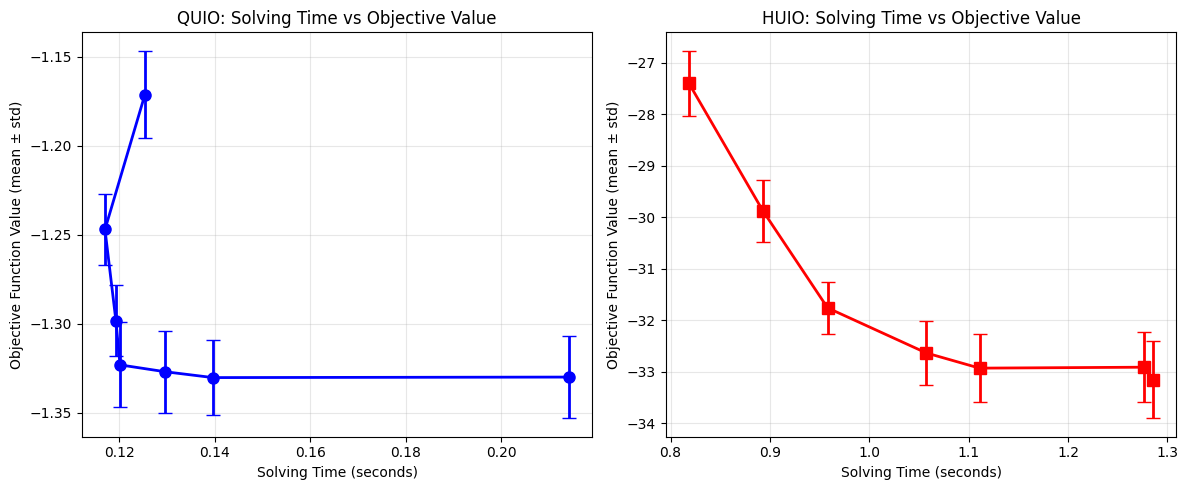

In [10]:
# Visualization of solving time and objective function values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# x-axis: solving time, y-axis: objective function value
quio_times = [result[1] for result in quio_results]
quio_energies = [result[2] for result in quio_results]
quio_stds = [result[3] for result in quio_results]
huio_times = [result[1] for result in huio_results]
huio_energies = [result[2] for result in huio_results]
huio_stds = [result[3] for result in huio_results]

ax1.errorbar(quio_times, quio_energies, yerr=quio_stds, fmt='bo-', linewidth=2, markersize=8, capsize=5)
ax1.set_xlabel('Solving Time (seconds)')
ax1.set_ylabel('Objective Function Value (mean ± std)')
ax1.set_title('QUIO: Solving Time vs Objective Value')
ax1.grid(True, alpha=0.3)

ax2.errorbar(huio_times, huio_energies, yerr=huio_stds, fmt='rs-', linewidth=2, markersize=8, capsize=5)
ax2.set_xlabel('Solving Time (seconds)')
ax2.set_ylabel('Objective Function Value (mean ± std)')
ax2.set_title('HUIO: Solving Time vs Objective Value')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Measuring energy distributions...


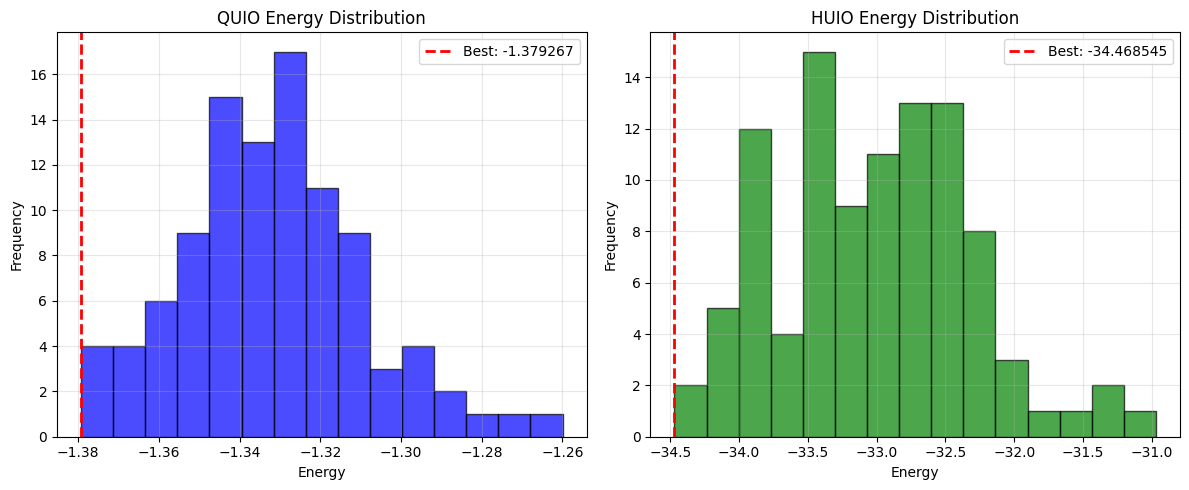

QUIO best solution energy: -1.379267
HUIO best solution energy: -34.468545
Energy improvement: 33.089278


In [11]:
# Energy distribution measurement
print("Measuring energy distributions...")

# Obtain multiple solutions to examine energy distribution
response_quio_dist = sampler.sample_quio(
    J=J_quio_random,
    bound_list=bound_list,
    num_sweeps=1000,
    num_reads=100,
    seed=42,
    num_threads=4  # parallel sampling (macOS/Linux only)
)

response_huio_dist = sampler.sample_huio(
    J=J_huio_random,
    bound_list=bound_list,
    num_sweeps=1000,
    num_reads=100,
    seed=42,
    num_threads=4  # parallel sampling (macOS/Linux only)
)

# Visualization of energy distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# QUIO energy distribution
energies_quio = response_quio_dist.data_vectors['energy']
ax1.hist(energies_quio, bins=15, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(np.min(energies_quio), color='red', linestyle='--', linewidth=2, 
           label=f'Best: {np.min(energies_quio):.6f}')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Frequency')
ax1.set_title('QUIO Energy Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# HUIO energy distribution
energies_huio = response_huio_dist.data_vectors['energy']
ax2.hist(energies_huio, bins=15, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(np.min(energies_huio), color='red', linestyle='--', linewidth=2, 
           label=f'Best: {np.min(energies_huio):.6f}')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Frequency')
ax2.set_title('HUIO Energy Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"QUIO best solution energy: {np.min(energies_quio):.6f}")
print(f"HUIO best solution energy: {np.min(energies_huio):.6f}")
print(f"Energy improvement: {(np.min(energies_quio) - np.min(energies_huio)):.6f}")

## Summary

In this tutorial, we learned how to solve unconstrained integer optimization problems using OpenJij:

### QUIO (Quadratic Unconstrained Integer Optimization)
- Integer optimization problems containing only terms up to quadratic order
- Uses the `sample_quio` method
- Objective function composed of linear and quadratic terms

### HUIO (Higher-order Unconstrained Integer Optimization)
- Integer optimization problems including higher-order terms
- Uses the `sample_huio` method
- Can express more complex interactions
- Objective function including cubic and higher-order terms

### Key Points
1. **Variable range specification**: Use `bound_list` to specify the range of integer values each variable can take
2. **Interaction representation**: Define interactions in dictionary format using tuples as keys
3. **Parameter adjustment**: Adjust optimization performance with parameters like `num_sweeps`, `num_reads`, etc.

These methods enable efficient solving of integer optimization problems that are difficult to express with binary variables.